#`ASSIGNMENT 7: BACKPROPAGATION | UNI: CHB2132 `#
##`5440 FIN. M.L./QUANT. | SPRING 2021 | PROF.  RITTER`

---

### **`Problem 1`**

#### *Show that matrix elements of 𝑑𝑓𝑥 w.r.t. standard basis/eigen vectors $𝑒_1 = (1,0,0,...)$, $𝑒_2 = (0,1,0,...),$ $...$ will be partial derivatives of $f$ along coordinate directions and $\therefore$ the Jacobian is the matrix associated to linear transformation 𝑑𝑓𝑥.*
---

*  *Consider a smooth map:* **𝑓 : R𝑛 → R𝑚.**

*  Linear transform with assumptions:
    * 𝑒1, 𝑒2, ... , 𝑒𝑛 = standard ordered bases in 𝑅𝑛
    * 𝑢1, 𝑢2, ... , 𝑢𝑚 = standard ordered bases in 𝑅𝑚

* Then, $𝑇(𝑒_𝑖)$ = $𝑓′(𝑎;𝑒_𝑖) = 𝐷_𝑖 𝑓(𝑎)$, where 𝑖 = 1, 2, ..., 𝑛

* Now, let $𝑓_1, 𝑓_2, ... , 𝑓_𝑚$ : 𝐴 $\rightarrow$ 𝑅

* For each 𝑖 = 1, 2, ... , 𝑛 we have: 

    * **$𝐷_𝑖 𝑓(𝑎) = (𝐷_𝑖 𝑓_1(𝑎), 𝐷_𝑖 𝑓_2(𝑎), . . . , 𝐷_𝑖 𝑓_𝑚(𝑎))$**

    * $\rightarrow$ $\Sigma^{m}_{𝑗 = 1}$ $𝐷_{𝑖}𝑓_{𝑗}(𝑎)𝑢_{𝑗}$
    
    * $\rightarrow$ $𝑇(𝑒_𝑖)$ = $\Sigma_{j = 1}^{m} 𝐷_{𝑖}𝑓_j(𝑎)𝑢_𝑗$

    * $\therefore$ matrix representation is given by:
    
        $[𝑇] = 𝐷𝑓(𝑎) = [𝑓′(𝑎)] =$ $(𝐷_{i}𝑓_{j}(𝑎))_{mxn}$
    
        $[𝐷_1 𝑓_1(𝑎) 𝐷_2 𝑓_1(𝑎) ... 𝐷_n 𝑓_1(𝑎)]$

        $[𝐷_1 𝑓_2(𝑎) 𝐷_2 𝑓_2(𝑎) ... 𝐷_n 𝑓_2(𝑎)]$

        $[.    .    .    ...    .]$
        
        $[𝐷_1 𝑓_𝑚(𝑎) 𝐷_2 𝑓_𝑚(𝑎) ... 𝐷_𝑛 𝑓_𝑚(𝑎)]$

*defined as the Jacobian Matrix of the vector field at the point 𝑎, Q.E.D.*

**Source**
---
```
Wikipedia. 2021. Jacobian Matrix and Determinant. https://en.wikipedia.org/wiki/Jacobian_matrix_and_determinant.
Asim, Haseeb. 2021. 5440 Homework 7: Backpropagation. Columbia University in the city of New York.
```

`Problem 2`
---
**Use Keras to perform multivariate OLS linear regression. Use a sequential model w/ single connection** *(dense layer w/ linear activation)*. **Generate training data from known linear model + train with: `optimizer ='sgd', loss='mse'`. Verify you get the expected result.**

In [ ]:
# import req. libs/pkgs

import numpy as np
import pandas as pd

import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import activations

from keras.optimizers import SGD 
from keras.models import Sequential
from keras.layers import Dense, Activation

In [ ]:
df = pd.read_csv('identity_data.csv')

X = df.iloc[:,0]
y = df.iloc[:,1]

#### `Prepare training data w. model + opt/loss parameters`

---

In [ ]:
# setup seq model w/ linear activation func. relu

sgd = SGD(0.01) #que

model = Sequential()
model.add(Dense(1, input_dim=1))
model.add(Activation('linear'))

model.compile(optimizer='sgd', loss='mse')
model.fit(X, y, batch_size=32, epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 399ms/step - loss: 197979770139392868352.0000
Epoch 2/10
1/1 [==============================] - 0s 7ms/step - loss: 8024272873468685451264.0000
Epoch 3/10
1/1 [==============================] - 0s 5ms/step - loss: 846387851051155194904576.0000
Epoch 4/10
1/1 [==============================] - 0s 9ms/step - loss: 90651137300976068227760128.0000
Epoch 5/10
1/1 [==============================] - 0s 10ms/step - loss: 9710454034476451417804505088.0000
Epoch 6/10
1/1 [==============================] - 0s 6ms/step - loss: 1040175037884899576610524495872.0000
Epoch 7/10
1/1 [==============================] - 0s 8ms/step - loss: 111422582446093681293474240921600.0000
Epoch 8/10
1/1 [==============================] - 0s 7ms/step - loss: 11935484998286379665454615486267392.0000
Epoch 9/10
1/1 [==============================] - 0s 5ms/step - loss: 1278518168823986012155734441955688448.0000
Epoch 10/10
1/1 [==============================] - 0s 7m

#### `Check the equivalence of the outcome and the expected result`
---

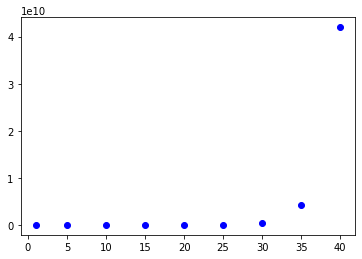

In [ ]:
# Evaluate the model on test data and predict results

history = model.fit(X, y, epochs=500,verbose=0)
pred = model.predict(X)

plt.scatter(X, y, c='blue')
plt.plot(X, pred, color='g')
plt.show()

**Sources**
---
```
Ritter, W. G. 2021. Supplemental Notes: 5440 Course. Columbia University in the city of New York.
Keras. 2021. Getting Started: Intro to Keras for Researchers. https://keras.io/getting_started/intro_to_keras_for_researchers.
Keras Team. 2021. Colab Guide: Intro to Keras for Researchers. https://colab.research.google.com/github/keras-team/keras-io/blob/master/guides/ipynb/intro_to_keras_for_researchers.ipynb#scrollTo=4QzEQpnzpew0
Tensorflow. 2021. Keras: Train and Evaluate. https://colab.research.google.com/github/tensorflow/docs/blob/snapshot-keras/site/en/guide/keras/train_and_evaluate.ipynb#scrollTo=69f524a93f9d.
```